# Expand With Interpolators <a href="https://mybinder.org/v2/gh/InsightSoftwareConsortium/SimpleITK-Notebooks/master?filepath=Python%2F20_Expand_With_Interpolators.ipynb"><img style="float: right;" src="https://mybinder.org/badge_logo.svg"></a>

This notebook demonstrates the different interpolators available in SimpleITK available for image resampling.  Their effect is demonstrated on the <a href="http://www.cs.cornell.edu/~srm/publications/Vis94-filters-abstract.html">Marschner-Lobb</a> image.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import SimpleITK as sitk
import numpy as np
import math

In [2]:
def myshow(img, title=None, margin=0.05):

    if img.GetDimension() == 3:
        img = sitk.Tile(
            (
                img[img.GetSize()[0] // 2, :, :],
                img[:, img.GetSize()[1] // 2, :],
                img[:, :, img.GetSize()[2] // 2],
            ),
            [2, 2],
        )

    aimg = sitk.GetArrayViewFromImage(img)

    xsize, ysize = aimg.shape

    dpi = 80

    # Make a figure big enough to accommodate an axis of xpixels by ypixels
    # as well as the ticklabels, etc...
    figsize = (1 + margin) * ysize / dpi, (1 + margin) * xsize / dpi

    fig = plt.figure(figsize=figsize, dpi=dpi)
    # Make the axis the right size...
    ax = fig.add_axes([margin, margin, 1 - 2 * margin, 1 - 2 * margin])

    t = ax.imshow(aimg)
    if len(aimg.shape) == 2:
        t.set_cmap("gray")
    if title:
        plt.title(title)
    plt.show()

In [3]:
def marschner_lobb(size=40, alpha=0.25, f_M=6.0):
    img = sitk.PhysicalPointSource(
        sitk.sitkVectorFloat32, [size] * 3, [-1] * 3, [2.0 / size] * 3
    )
    imgx = sitk.VectorIndexSelectionCast(img, 0)
    imgy = sitk.VectorIndexSelectionCast(img, 1)
    imgz = sitk.VectorIndexSelectionCast(img, 2)
    del img
    r = sitk.Sqrt(imgx ** 2 + imgy ** 2)
    del imgx, imgy
    pr = sitk.Cos((2.0 * math.pi * f_M) * sitk.Cos((math.pi / 2.0) * r))
    return (1.0 - sitk.Sin((math.pi / 2.0) * imgz) + alpha * (1.0 + pr)) / (
        2.0 * (1.0 + alpha)
    )

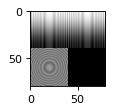

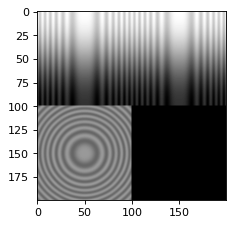

In [4]:
myshow(marschner_lobb())
myshow(marschner_lobb(100))

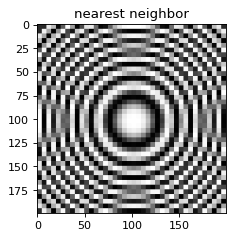

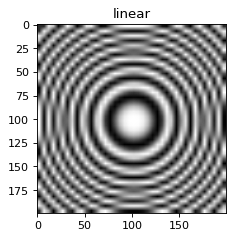

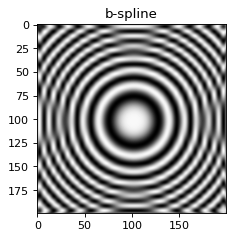

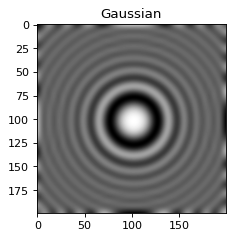

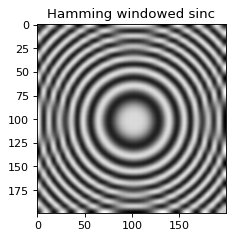

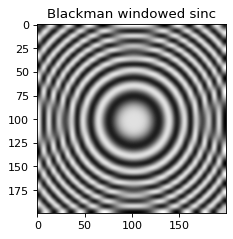

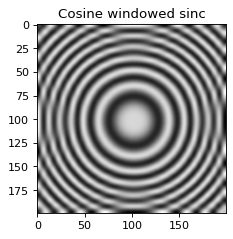

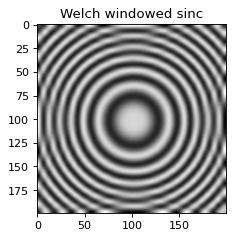

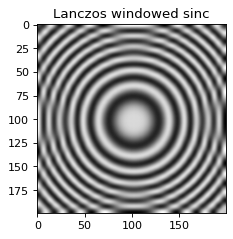

In [5]:
ml = marschner_lobb()
ml = ml[:, :, ml.GetSize()[-1] // 2]
myshow(sitk.Expand(ml, [5] * 3, sitk.sitkNearestNeighbor), title="nearest neighbor")
myshow(sitk.Expand(ml, [5] * 3, sitk.sitkLinear), title="linear")
myshow(sitk.Expand(ml, [5] * 3, sitk.sitkBSpline), title="b-spline")
myshow(sitk.Expand(ml, [5] * 3, sitk.sitkGaussian), title="Gaussian")
myshow(
    sitk.Expand(ml, [5] * 3, sitk.sitkHammingWindowedSinc),
    title="Hamming windowed sinc",
)
myshow(
    sitk.Expand(ml, [5] * 3, sitk.sitkBlackmanWindowedSinc),
    title="Blackman windowed sinc",
)
myshow(
    sitk.Expand(ml, [5] * 3, sitk.sitkCosineWindowedSinc), title="Cosine windowed sinc"
)
myshow(
    sitk.Expand(ml, [5] * 3, sitk.sitkWelchWindowedSinc), title="Welch windowed sinc"
)
myshow(
    sitk.Expand(ml, [5] * 3, sitk.sitkLanczosWindowedSinc),
    title="Lanczos windowed sinc",
)